In [ ]:
# Imports
import pandas as pd
import numpy as np
import nltk 
import matplotlib.pyplot as plt
import csv
import random
from reduction_function import apply_umap, apply_pca, plot_c, 

In [2]:
reclustered_monthly_data = pd.read_csv("output_hpc/reclustered_monthly_data_final.csv", sep = "\t", encoding = "utf-8", quoting = csv.QUOTE_NONE )

In [3]:
data = reclustered_monthly_data.head(100)

In [ ]:
n_rows = data.shape[0]

In [31]:
data["A"] = np.random.rand(n_rows)
data["F"] = np.random.rand(n_rows)
data["N"] = np.random.rand(n_rows)

/tmp/ipykernel_9179/686247784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["A"] = np.random.rand(n_rows)
/tmp/ipykernel_9179/686247784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["F"] = np.random.rand(n_rows)
/tmp/ipykernel_9179/686247784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [32]:
data_avg = data.groupby("user")[['A', 'F', 'N']].mean().reset_index()

In [33]:
max_val = data_avg.iloc[1][["A", "F", "N"]].max()
max_col = data_avg.iloc[1][["A", "F"]].idxmax()
print(max_val *-1)
print(max_val, max_col)

-0.9164021220578908
0.9164021220578908 F


In [4]:
def get_stance(row): 
    if row["N"] == 1.0: 
        return 0
    elif row["A"] > row["F"]:
        return row["A"]
    elif row["F"] > row["A"]:
        return row["F"]*-1
    else: 
        return random.choice([row["A"], row["F"]])

In [35]:
data_avg["stance"] = data_avg.apply(lambda x: get_stance(x), axis = 1)

#### Getting the stance for each user for each topic

In [5]:
def make_dataset(data):
    data = reclustered_monthly_data.head(100)
    n_rows = data.shape[0]
    data["A"] = np.random.rand(n_rows)
    data["F"] = np.random.rand(n_rows)
    data["N"] = np.random.rand(n_rows)
    data_avg = data.groupby("user")[['A', 'F', 'N']].mean().reset_index()
    data_avg["stance"] = data_avg.apply(lambda x: get_stance(x), axis = 1)
    return data_avg

In [6]:
data_1 = make_dataset(reclustered_monthly_data)
data_2 = make_dataset(reclustered_monthly_data)
data_3 = make_dataset(reclustered_monthly_data)

/tmp/ipykernel_963/2471956829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["A"] = np.random.rand(n_rows)
/tmp/ipykernel_963/2471956829.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["F"] = np.random.rand(n_rows)
/tmp/ipykernel_963/2471956829.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [7]:
data1 = data_1.rename(columns={"stance": "stance_1"})
data2 = data_2.rename(columns={"stance": "stance_2"})
data3 = data_3.rename(columns={"stance": "stance_3"})

In [8]:
merged_df = pd.merge(pd.merge(data1, data2, on='user'), data3, on='user')

In [9]:
merged_df = merged_df[["user", "stance_1", "stance_2", "stance_3"]]
merged_df

,user,stance_1,stance_2,stance_3
0,AlbionPrince,0.262788,-0.858518,-0.457995
1,BenFoldsFourLoko,-0.299325,0.876291,-0.703058
2,Betrashndie,-0.643802,0.450210,-0.236562
3,BloodWiz,0.655287,-0.718841,-0.816623
4,Call_Me_Hurr1cane,-0.852156,0.643492,-0.875455
...,...,...,...,...
91,thebigslapper,-0.983220,-0.886311,0.256628
92,throwrowrowawayyy,-0.992074,0.343692,0.466809
93,trogon,-0.855351,0.512198,0.834005
94,weeteacups,-0.322617,-0.767450,-0.817584


#### Dimensionality reduction - UMAP 

In [ ]:
import umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [51]:
merged_df_umap = merged_df.copy()

In [ ]:
column_list = ['stance_1', 'stance_2', 'stance_3']
apply_umap(merged_df_umap, column_list)

/home/jnye/miniconda3/envs/bach_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jnye/miniconda3/envs/bach_env/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


,user,stance_1,stance_2,stance_3,umap_component
0,AlbionPrince,0.374997,-1.287706,-0.726856,13.080755
1,BenFoldsFourLoko,-0.421439,1.278376,-1.096213,7.919227
2,Betrashndie,-0.909514,0.648128,-0.393114,5.901335
3,BloodWiz,0.931112,-1.081101,-1.267376,13.414395
4,Call_Me_Hurr1cane,-1.204722,0.934025,-1.356047,7.360206
...,...,...,...,...,...
91,thebigslapper,-1.390422,-1.328817,0.350217,4.456283
92,throwrowrowawayyy,-1.402966,0.490570,0.667000,-4.239312
93,trogon,-1.209249,0.739818,1.220435,-4.958436
94,weeteacups,-0.454440,-1.153001,-1.268825,12.095720


In [39]:
reducer = umap.UMAP(random_state=42) #object of class UMAP
scaler = StandardScaler()

In [40]:
# Fit and transform the numerical columns
merged_df_umap[['stance_1', 'stance_2', 'stance_3']] = scaler.fit_transform(merged_df_umap[['stance_1', 'stance_2', 'stance_3']])
merged_df_umap.head()

,user,stance_1,stance_2,stance_3
0,AlbionPrince,0.374997,-1.287706,-0.726856
1,BenFoldsFourLoko,-0.421439,1.278376,-1.096213
2,Betrashndie,-0.909514,0.648128,-0.393114
3,BloodWiz,0.931112,-1.081101,-1.267376
4,Call_Me_Hurr1cane,-1.204722,0.934025,-1.356047


/home/dara/miniconda3/envs/bach_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Features' shape: (96, 2)
                user  Component 1  Component 2
0       AlbionPrince     3.568209    -4.217590
1   BenFoldsFourLoko    -2.893073     7.371824
2        Betrashndie     2.321366     4.462049
3           BloodWiz     4.802084     2.168251
4  Call_Me_Hurr1cane    -0.092606     6.237177


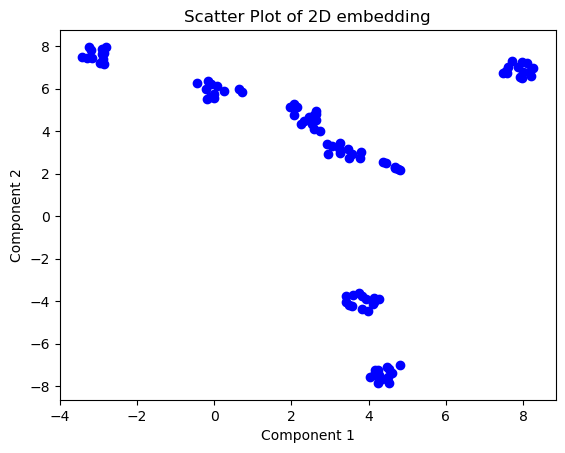

In [64]:
#By default UMAP always reduces to 2D embeddings
embedding_2D = reducer.fit_transform(merged_df_umap[['stance_1', 'stance_2', 'stance_3']])
print(f"Features' shape: {embedding_2D.shape}")
df_embedding_2D = pd.DataFrame(embedding_2D, columns=["Component 1", "Component 2"])
#adding back username column
user_embedding_2D = pd.concat([merged_df_umap["user"], df_embedding_2D], axis=1)
print(user_embedding_2D.head())

#plotting the 2 components
plt.scatter(df_embedding_2D["Component 1"], df_embedding_2D["Component 2"], color='blue', marker='o')

# Add labels and title
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Scatter Plot of 2D embedding')

# Show the plot
plt.show()

In [41]:
#Same thing as above, but to 1D feature
reducer_1D = umap.UMAP(n_components=1, random_state=42)
embedding_1D = reducer_1D.fit_transform(merged_df_umap[['stance_1', 'stance_2', 'stance_3']])
print(f"Features' shape: {embedding_1D.shape}")
pd.DataFrame(embedding_1D).head()
#adding back username column
# user_embedding = pd.concat([merged_df_umap["user"], embedding_2D], axis=1)
merged_df_umap["umap_component"] = reducer_1D.fit_transform(merged_df_umap[['stance_1', 'stance_2', 'stance_3']])

Features' shape: (96, 1)


/home/jnye/miniconda3/envs/bach_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jnye/miniconda3/envs/bach_env/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/jnye/miniconda3/envs/bach_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [42]:
merged_df_umap

,user,stance_1,stance_2,stance_3,umap_component
0,AlbionPrince,0.374997,-1.287706,-0.726856,13.080755
1,BenFoldsFourLoko,-0.421439,1.278376,-1.096213,7.919227
2,Betrashndie,-0.909514,0.648128,-0.393114,5.901335
3,BloodWiz,0.931112,-1.081101,-1.267376,13.414395
4,Call_Me_Hurr1cane,-1.204722,0.934025,-1.356047,7.360206
...,...,...,...,...,...
91,thebigslapper,-1.390422,-1.328817,0.350217,4.456283
92,throwrowrowawayyy,-1.402966,0.490570,0.667000,-4.239312
93,trogon,-1.209249,0.739818,1.220435,-4.958436
94,weeteacups,-0.454440,-1.153001,-1.268825,12.095720


#### Dimensionality reduction - PCA

In [10]:
merged_df_pca = merged_df.copy()

In [11]:
from sklearn.decomposition import PCA
import sklearn.preprocessing as pre

In [12]:
# scaling the images
scaler = pre.StandardScaler()
merged_df_pca[["stance_1", "stance_2", "stance_3"]] = scaler.fit_transform(merged_df_pca[["stance_1", "stance_2", "stance_3"]])

In [13]:
pca = PCA(n_components=1)

In [14]:
merged_df_pca["pca_component"] = pca.fit_transform(merged_df_pca[["stance_1", "stance_2", "stance_3"]])

In [33]:
pca.fit_transform(merged_df_pca[["stance_1", "stance_2", "stance_3"]])

array([[ 0.87996457],
       [-1.47613941],
       [-1.17158416],
       [ 0.95296346],
       [-1.86332761],
       [ 2.10153942],
       [ 1.12213575],
       [-0.04474873],
       [-0.05842907],
       [ 0.19168757],
       [-0.41935412],
       [-0.17836894],
       [ 0.08358425],
       [ 1.08195842],
       [-0.23059534],
       [-0.61912863],
       [ 1.60576365],
       [ 0.38009871],
       [-1.07621956],
       [-1.78500354],
       [ 0.12703401],
       [ 0.03677948],
       [ 1.52306571],
       [ 1.74827158],
       [ 0.96805505],
       [ 1.50931733],
       [ 0.26479518],
       [-0.80902749],
       [-1.67151603],
       [ 0.61265317],
       [ 1.77221747],
       [-1.73982691],
       [-0.61282545],
       [ 1.69595472],
       [-1.99887476],
       [-0.36854055],
       [-1.81029544],
       [-1.75949985],
       [-0.88553753],
       [ 1.26843444],
       [-0.8135338 ],
       [ 0.61292437],
       [-0.91933409],
       [ 1.24917889],
       [ 0.27974222],
       [-0

In [15]:
merged_df_pca

,user,stance_1,stance_2,stance_3,pca_component
0,AlbionPrince,0.374997,-1.287706,-0.726856,0.879965
1,BenFoldsFourLoko,-0.421439,1.278376,-1.096213,-1.476139
2,Betrashndie,-0.909514,0.648128,-0.393114,-1.171584
3,BloodWiz,0.931112,-1.081101,-1.267376,0.952963
4,Call_Me_Hurr1cane,-1.204722,0.934025,-1.356047,-1.863328
...,...,...,...,...,...
91,thebigslapper,-1.390422,-1.328817,0.350217,0.041481
92,throwrowrowawayyy,-1.402966,0.490570,0.667000,-1.071683
93,trogon,-1.209249,0.739818,1.220435,-0.931359
94,weeteacups,-0.454440,-1.153001,-1.268825,0.056044


In [ ]:
def apply_pca(merged_df_topics, colume_list): 
    # scaler
    scaler = pre.StandardScaler()
    merged_df_topics[colume_list] = scaler.fit_transform(merged_df_topics[colume_list])

    # pca 
    pca = PCA(n_components=1)
    merged_df_topics["pca_component"] = pca.fit_transform(merged_df_topics[["stance_1", "stance_2", "stance_3"]])
    return merged_df_topics

In [16]:
apply_pca(merged_df_pca, ["stance_1", "stance_2", "stance_3"])

,user,stance_1,stance_2,stance_3,pca_component
0,AlbionPrince,-0.982052,-1.118597,-1.180277,-1.736947
1,BenFoldsFourLoko,1.120012,-0.382365,1.336297,0.809821
2,Betrashndie,-1.533003,1.486847,1.007579,1.555478
3,BloodWiz,1.138618,-0.579512,0.929322,0.388619
4,Call_Me_Hurr1cane,-0.910845,0.008304,0.950744,0.556389
...,...,...,...,...,...
91,thebigslapper,0.058330,-1.059824,-1.263380,-1.621922
92,throwrowrowawayyy,-1.514908,-1.004566,-1.214585,-1.748510
93,trogon,0.263054,-0.318900,-1.491373,-1.235430
94,weeteacups,0.921673,0.953872,-1.216253,-0.065420


In [16]:
pca.explained_variance_

array([1.36669598])

In [17]:
pca.explained_variance_ratio_

array([0.45081986])

#### Plotting the graphs for the dimensionality reduction

In [44]:
num_users = merged_df_umap.shape[0]
y_axis = np.random.rand(num_users)

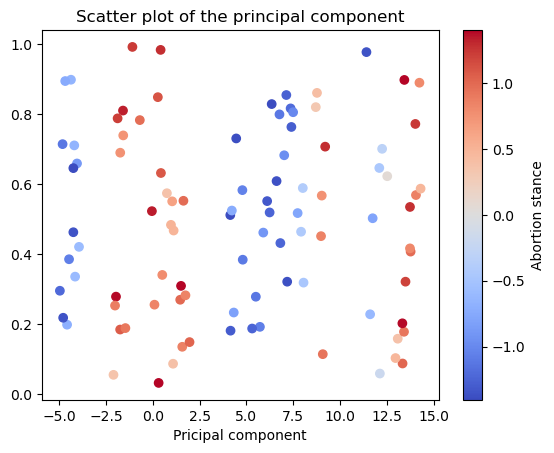

In [45]:
scatter = plt.scatter(merged_df_umap["umap_component"], y_axis, c=merged_df_umap['stance_1'], cmap='coolwarm')
cbar = plt.colorbar(scatter)
cbar.set_label('Abortion stance')
plt.xlabel('Pricipal component')
#plt.ylabel('Weight (kg)')
plt.title('Scatter plot of the principal component')
plt.show()

#### Missing users

In [20]:
user_nodeid = pd.read_csv("reddit_22_51/user_nodeid.csv", sep="\t" )

In [22]:
user_nodeid_dict = user_nodeid.set_index('index')['nodeid'].to_dict()

In [43]:
reclustered_monthly_data['nodeid'] = reclustered_monthly_data['user'].map(user_nodeid_dict)

In [ ]:

len(reclustered_monthly_data[reclustered_monthly_data['nodeid'].isna()]["user"].to_list())

221607

In [49]:
len(reclustered_monthly_data)

2162927

In [50]:
len(user_nodeid)

1240195

In [51]:
1240195-2162927

-922732

In [52]:
data = pd.read_csv("month_data/22_12.csv", sep = "\t", encoding = "utf-8", quoting = csv.QUOTE_NONE )

In [ ]:
user_nodeid = pd.read_csv("reddit_22_51/user_nodeid.csv", sep="\t" )
user_nodeid_dict = user_nodeid.set_index('index')['nodeid'].to_dict()

In [53]:
data['nodeid'] = data['user'].map(user_nodeid_dict)

In [55]:
len(data[data['nodeid'].isna()]["user"].to_list())

221607

In [56]:
missing_users = data[data['nodeid'].isna()]["user"].to_list()